## Clustering Project - Kmeans/Hierarchical

##Task 1

In [1]:
# Importing Libraries
import pandas as pd
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn import metrics


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [77]:
# Uploading Datasets
from google.colab import files
uploaded = files.upload()

Saving Data1.csv to Data1.csv
Saving Data2.csv to Data2.csv
Saving Data3.csv to Data3.csv
Saving Data4.csv to Data4.csv
Saving Data5.csv to Data5.csv
Saving Data6.csv to Data6.csv
Saving Data7.csv to Data7.csv
Saving Data8.csv to Data8.csv
Saving World Indicators.csv to World Indicators (1).csv


###Dataset 1

In [ ]:
df1 = pd.read_csv('Data1.csv')
df1.head(5)

Unnamed: 0        X1        X2        X3  Class
0           1 -0.063274  0.027734  0.022683      1
1           2 -0.000731  0.048211  0.069198      1
2           3 -0.060767 -0.009080  0.053085      1
3           4  0.013252 -0.011876  0.055324      1
4           5 -0.054508 -0.003813  0.001738      1

In [ ]:
df1.describe()

Unnamed: 0          X1          X2          X3       Class
count  212.000000  212.000000  212.000000  212.000000  212.000000
mean   106.500000    0.015418    0.034183   -0.035626    3.971698
std     61.343296    1.647716    1.670505    1.628822    2.016320
min      1.000000   -3.970394   -3.881493   -3.909294    1.000000
25%     53.750000   -0.407496   -0.476732   -0.423145    2.000000
50%    106.500000   -0.003762   -0.004597    0.021322    4.000000
75%    159.250000    0.438729    0.500722    0.384359    6.000000
max    212.000000    3.747710    3.774495    3.899389    7.000000

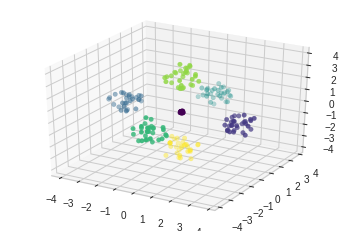

In [ ]:
# Plotting the 3 dimensional data
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df1['X1'], df1['X2'], df1['X3'], cmap = 'viridis', c=df1['Class']);

# As we can see there are 7 classes in the dataset 1 which can be seen as 7 clusters in the 3d diagram

####Kmeans

In [ ]:
# Plotting Elbow curve to determine the number of clusters
k = []
wcss = []
for i in range(1, 10):
  mdl = KMeans(n_clusters=i)
  mdl.fit(df1.iloc[:,1:4])
  k.append(i)
  wcss.append(mdl.inertia_)

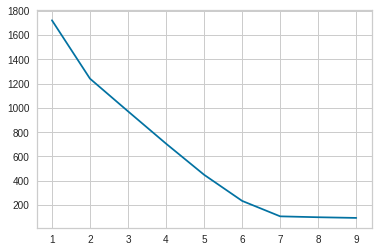

In [ ]:
sns.lineplot(k, wcss)

We can see that the Elbow is forming at k = 7, so we can take nluster value as 7 which is similar to the classes in original dataset1

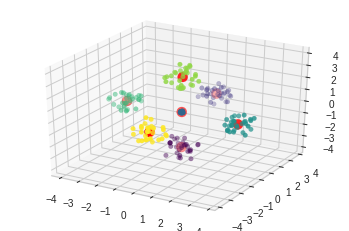

In [ ]:
# KMeans Clustering
mdl = KMeans(n_clusters=7)
mdl.fit(df1.iloc[:,1:4])
df1['KMeansClass'] = mdl.labels_


# Plotting the 3 dimensional data with 'Centroids' as cluster centers
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df1['X1'], df1['X2'], df1['X3'], cmap = 'viridis', c=df1['KMeansClass']);
ax.scatter3D(mdl.cluster_centers_[:, 0], mdl.cluster_centers_[:, 1], mdl.cluster_centers_[:, 2], s = 100, c = 'red', label = 'Centroids')
plt.show()

####Hierarchical Clustering

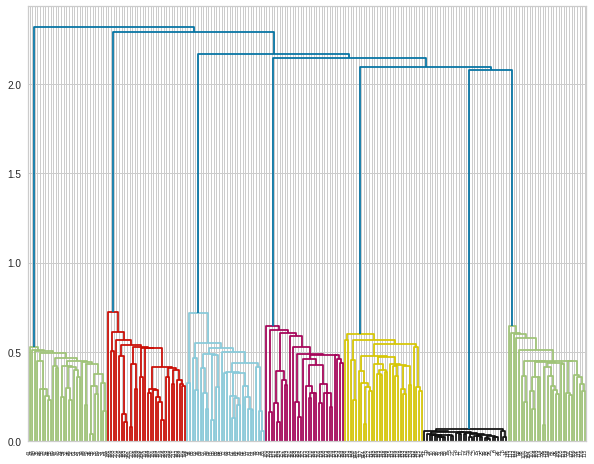

In [ ]:
# Plotting Dendrogram to determine the number of clusters for Hierarchical Clustering

plt.figure(figsize = (10, 8))
z = linkage(df1.iloc[:, 1:4], method = 'single')
dendo = dendrogram(z)

By looking at this dendrogram we can see that the value of k = 7, so we can take ncluster value as 7 which is similar to the number of classes in the original dataset2

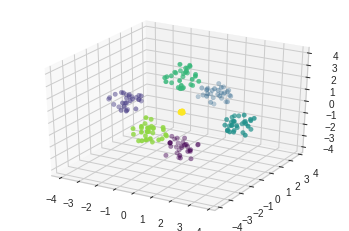

In [ ]:
#Hierarchical Clustering - Agglomerative Clustering
hCluster = AgglomerativeClustering(n_clusters=7, linkage = 'single')
hCluster.fit_predict(df1.iloc[:,1:4])
df1['hClusterClass'] = hCluster.labels_

# Plotting the 3 dimensional data
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df1['X1'], df1['X2'], df1['X3'], cmap = 'viridis', c=df1['hClusterClass']);
plt.show()

####Evaluation

Using Folkes Mallows method to evaluating the clusters

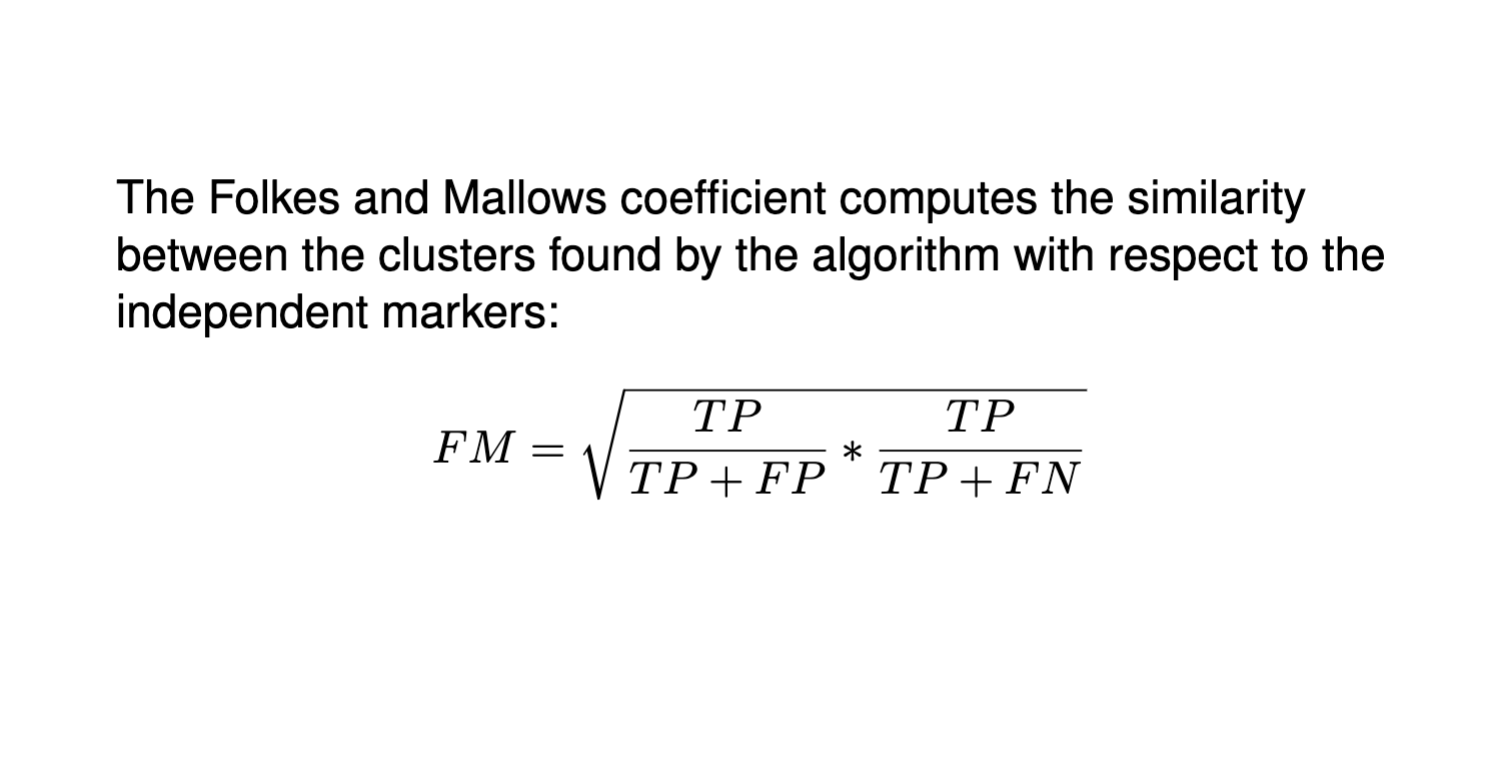

In [ ]:
# Using Fowlkes Mallows score to determine the performance or to evaluate the clustering methods
Kmeans_Score = fowlkes_mallows_score(df1['Class'], df1['KMeansClass'])
HCluster_Score = fowlkes_mallows_score(df1['Class'], df1['hClusterClass'])
print('KMeans Score:', Kmeans_Score)
print('HCluster Score:', HCluster_Score)

KMeans Score: 1.0
HCluster Score: 1.0


So for Dataset 1 both KMeans and Hierarchical Clustering are performing equally and have a perfect score of 1 which means that they have classfied each data point correctly 

###Dataset 2

In [ ]:
df2 = pd.read_csv('Data2.csv')
df2.head(5)

Unnamed: 0         X         Y         C  Class
0         X1  3.277701  0.814082  0.326574      1
1         X2  0.387577  0.176780  0.888046      1
2         X3  0.268546  0.582963  0.080981      1
3         X4  2.031145  0.244597  0.643921      1
4         X5  0.188677  0.461280  0.496633      1

In [ ]:
df2.describe()

X           Y           C       Class
count  404.000000  404.000000  404.000000  404.000000
mean     1.933463    1.810708    1.124684    1.772277
std      1.103075    1.485172    0.898426    0.855648
min      0.029780    0.004658   -0.151982    1.000000
25%      0.967144    0.532077    0.454854    1.000000
50%      1.727904    1.602773    0.786504    2.000000
75%      2.910134    2.756231    1.766672    3.000000
max      4.229498    5.385811    3.388138    4.000000

In [ ]:
# Plotting the 3 dimensional data

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df2['X'], df2['Y'], df2['C'], cmap = 'viridis', c=df2['Class']);

In [ ]:
# Scaling the dataset using MinMax Scalar function

scaler = MinMaxScaler(feature_range=(0,1))
df2Scaled = scaler.fit_transform(df2.iloc[:,1:4])
df2Scaled = pd.DataFrame(df2Scaled, columns=('X', 'Y', 'C'))
df2Scaled

X         Y         C
0    0.773366  0.150418  0.135181
1    0.085195  0.031986  0.293783
2    0.056853  0.107469  0.065807
3    0.476547  0.044589  0.224824
4    0.037835  0.084856  0.183218
..        ...       ...       ...
399  0.766450  0.426049  1.000000
400  0.969165  0.946887  0.185457
401  0.921543  0.909720  0.308921
402  0.945354  0.928303  0.241264
403  0.969165  0.946887  0.293670

[404 rows x 3 columns]

####KMeans Clustering

In [ ]:
# Plotting Elbow curve to determine the number of clusters
k = []
wcss = []
for i in range(1, 10):
  mdl = KMeans(n_clusters=i)
  mdl.fit(df2Scaled)
  k.append(i)
  wcss.append(mdl.inertia_)

In [ ]:
sns.lineplot(k, wcss)

We can see that the Elbow is forming at k = 4, so we can take nluster value as 4 which is similar to the number of classes in the original dataset2

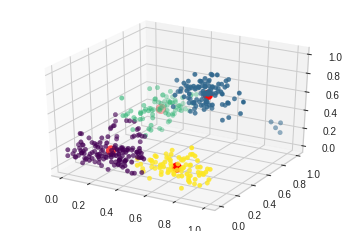

In [ ]:
#KMeans Clustering
mdl = KMeans(n_clusters=4)
mdl.fit(df2Scaled)
df2['KMeansClass'] = mdl.labels_

# Plotting the 3 dimensional data
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df2Scaled['X'], df2Scaled['Y'], df2Scaled['C'], cmap = 'viridis', c=df2['KMeansClass']);
ax.scatter3D(mdl.cluster_centers_[:, 0], mdl.cluster_centers_[:, 1], mdl.cluster_centers_[:, 2], s = 100, c = 'red', label = 'Centroids')
plt.show()

####Hierarchical Clustering

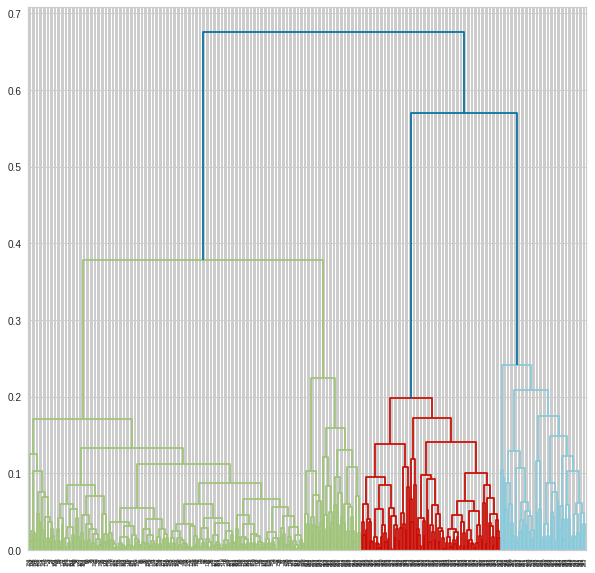

In [ ]:
# Plotting Dendrogram to determine the number of clusters for Hierarchical Clustering

plt.figure(figsize = (10, 10))
z = linkage(df2Scaled.iloc[:, 1:4], method = 'average')
dendo = dendrogram(z)

By looking at this dendrogram we can see that the value of k = 4, so we can take ncluster value as 4 which is similar to the number of classes in the original dataset2

In [ ]:
#Hierarchical Clustering - Agglomerative Clustering

hCluster = AgglomerativeClustering(n_clusters=4, linkage = 'average')
hCluster.fit_predict(df2Scaled)
df2['hClusterClass'] = hCluster.labels_

# Plotting the 3 dimensional data
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df2Scaled['X'], df2Scaled['Y'], df2Scaled['C'], cmap = 'viridis', c=df2['hClusterClass']);
plt.show()

####Evaluation

In [ ]:
# Using Fowlkes Mallows score to determine the performance or to evaluate the clustering methods

Kmeans_Score = fowlkes_mallows_score(df2['Class'], df2['KMeansClass'])
HCluster_Score = fowlkes_mallows_score(df2['Class'], df2['hClusterClass'])
print('KMeans Score:', Kmeans_Score)
print('HCluster Score:', HCluster_Score)

KMeans Score: 0.7318067716620308
HCluster Score: 1.0


So for Dataset 2 Hcluster method is performing better than the Kmeans clustering method. HCluster has a perfect score which means that it has classfied each data point correctly 

###Dataset 3

In [ ]:
df3 = pd.read_csv('Data3.csv')
df3.head(5)

Unnamed: 0        X1        X2        X3  Class
0           1  1.295428  0.050829 -0.385217      1
1           2  1.409178 -0.035191 -0.251980      1
2           3  1.096803  0.246365 -0.415011      1
3           4  1.463328  0.265354 -0.513488      1
4           5  1.603284  0.080577 -0.470257      1

In [ ]:
df3.describe()

Unnamed: 0          X1          X2          X3       Class
count  400.000000  400.000000  400.000000  400.000000  400.000000
mean   200.500000    0.116703   -0.065265    0.023340    2.500000
std    115.614301    0.893028    0.890075    0.896590    1.119434
min      1.000000   -1.481394   -2.080121   -1.341069    1.000000
25%    100.750000   -0.496078   -0.719790   -0.622889    1.750000
50%    200.500000   -0.036501   -0.036603   -0.246845    2.500000
75%    300.250000    0.714768    0.568605    0.445541    3.250000
max    400.000000    2.090848    1.991350    2.238607    4.000000

In [ ]:
# Plotting the 3 dimensional data

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df3['X1'], df3['X2'], df3['X3'], cmap = 'viridis', c=df3['Class']);

####KMeans Clustering

In [ ]:
# Plotting Elbow curve to determine the number of clusters

k = []
wcss = []
for i in range(1, 10):
  mdl = KMeans(n_clusters=i)
  mdl.fit(df3.iloc[:,1:4])
  k.append(i)
  wcss.append(mdl.inertia_)

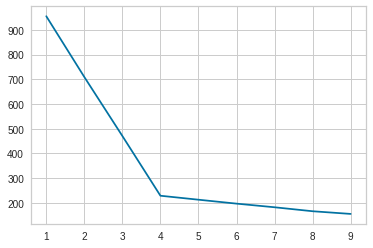

In [ ]:
sns.lineplot(k, wcss)

We can see that the Elbow is forming at k = 4, so we can take nluster value as 4 which is similar to the number of classes in the original dataset3

In [ ]:
#KMeans Clustering
mdl = KMeans(n_clusters=4)
mdl.fit(df3.iloc[:,1:4])
df3['KMeansClass'] = mdl.labels_

# Plotting the 3 dimensional data
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df3['X1'], df3['X2'], df3['X3'], cmap = 'viridis', c=df3['KMeansClass']);
ax.scatter3D(mdl.cluster_centers_[:, 0], mdl.cluster_centers_[:, 1], mdl.cluster_centers_[:, 2], s = 100, c = 'red', label = 'Centroids')
plt.show()

####Hierarchical Clustering

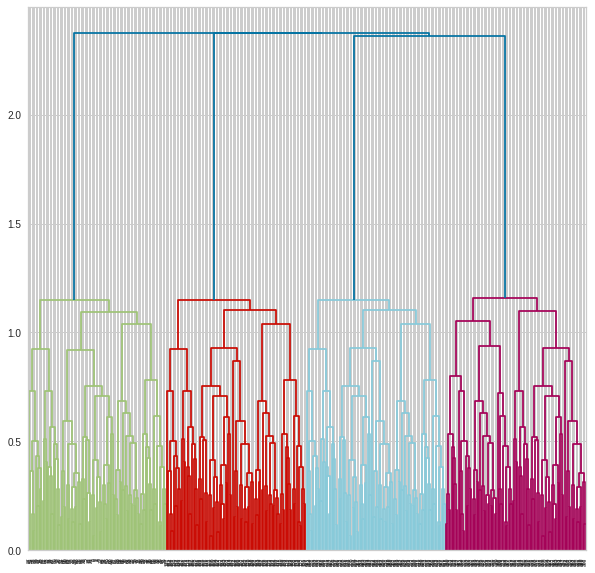

In [ ]:
# Plotting Dendrogram to determine the number of clusters for Hierarchical Clustering

plt.figure(figsize = (10, 10))
z = linkage(df3.iloc[:, 1:4], method = 'average')
dendo = dendrogram(z)

By looking at this dendrogram we can see that the value of k = 4, so we can take ncluster value as 4 which is similar to the number of classes in the original dataset3

In [ ]:
# Hierarchical Clustering - Agglomerative Clustering

hCluster = AgglomerativeClustering(n_clusters=4, linkage = 'average')
hCluster.fit_predict(df3.iloc[:,1:4])
df3['hClusterClass'] = hCluster.labels_

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df3['X1'], df3['X2'], df3['X3'], cmap = 'viridis', c=df3['hClusterClass']);
plt.show()

####Evaluation

In [ ]:
# Using Fowlkes Mallows score to determine the performance or to evaluate the clustering methods

Kmeans_Score = fowlkes_mallows_score(df3['Class'], df3['KMeansClass'])
HCluster_Score = fowlkes_mallows_score(df3['Class'], df3['hClusterClass'])
print('KMeans Score:', Kmeans_Score)
print('HCluster Score:', HCluster_Score)

KMeans Score: 1.0
HCluster Score: 0.9949748746890861


So for Dataset 3 Hcluster method and KMeans are alomst performing equally with a perfect score of 1 which means that it has classfied each data point correctly 

###Dataset 4

In [ ]:
df4 = pd.read_csv('Data4.csv')
df4.head(5)

Unnamed: 0      X1     X2       X3  Class
0           1 -0.4530 -0.891  0.02300      1
1           2  0.6530 -0.846  0.02110      1
2           3  0.3980  0.913 -0.00139      1
3           4  0.0952  1.050  0.00628      1
4           5  0.5240 -0.941  0.03780      1

In [ ]:
df4.describe()

Unnamed: 0           X1           X2           X3       Class
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000
mean    500.500000    -0.007884     0.429842    -0.007884     1.50000
std     288.819436     0.490354     0.875374     0.490354     0.50025
min       1.000000    -1.070000    -1.080000    -1.070000     1.00000
25%     250.750000    -0.083200    -0.181750    -0.083200     1.00000
50%     500.500000     0.002615     0.426500     0.002615     1.50000
75%     750.250000     0.081300     0.977000     0.081300     2.00000
max    1000.000000     1.070000     2.090000     1.070000     2.00000

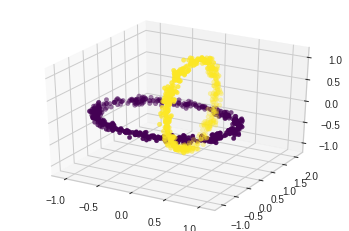

In [ ]:
# Plotting the 3 dimensional data

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df4['X1'], df4['X2'], df4['X3'], cmap = 'viridis', c=df4['Class']);

####KMeans Clustering

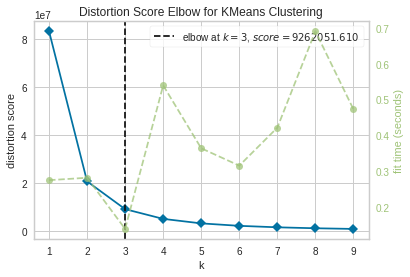

In [ ]:
# Plotting Elbow curve to determine the number of clusters

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings= True, locate_elbow=True)
visualizer.fit(df4)
visualizer.show() 

We can see that the Elbow is forming at k = 3, which is not equal to the original classes present in the data (that is 2)

So we will evaluate KMeans for both, k = 3 (internal validation) and 2 (external validation)

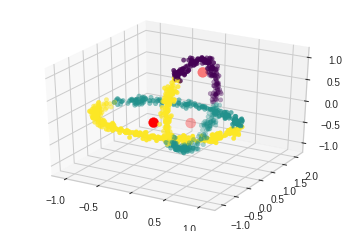

In [ ]:
#KMeans Clustering as k = 3
mdl = KMeans(n_clusters=3)
mdl.fit(df4.iloc[:,1:4])
df4['KMeansClassInternal'] = mdl.labels_

# Plotting the 3 dimensional data
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df4['X1'], df4['X2'], df4['X3'], cmap = 'viridis', c=df4['KMeansClassInternal']);
ax.scatter3D(mdl.cluster_centers_[:, 0], mdl.cluster_centers_[:, 1], mdl.cluster_centers_[:, 2], s = 100, c = 'red', label = 'Centroids')
plt.show()

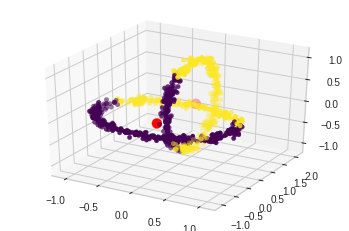

In [ ]:
#KMeans Clustering as k = 2
mdl = KMeans(n_clusters=2)
mdl.fit(df4.iloc[:,1:4])
df4['KMeansClassExternal'] = mdl.labels_

# Plotting the 3 dimensional data
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df4['X1'], df4['X2'], df4['X3'], cmap = 'viridis', c=df4['KMeansClassExternal']);
ax.scatter3D(mdl.cluster_centers_[:, 0], mdl.cluster_centers_[:, 1], mdl.cluster_centers_[:, 2], s = 100, c = 'red', label = 'Centroids')
plt.show()

####Hierarchical Clustering

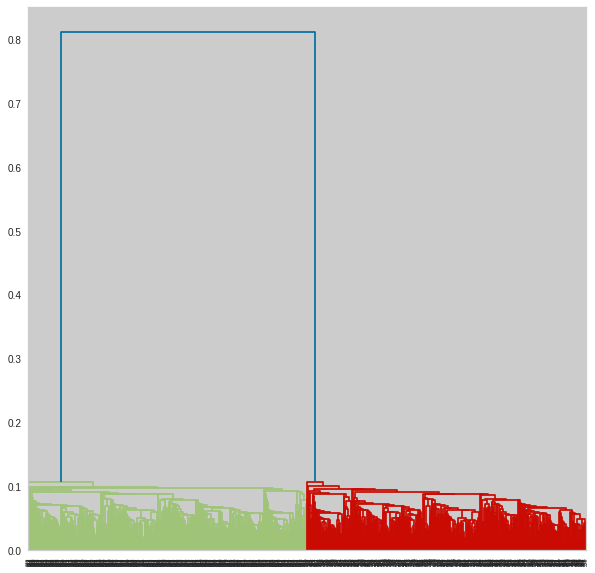

In [ ]:
# Plotting Dendrogram to determine the number of clusters for Hierarchical Clustering

plt.figure(figsize = (10, 10))
z = linkage(df4.iloc[:, 1:4], method = 'single')
dendo = dendrogram(z)

By looking at this dendrogram we can see that the value of k = 2, so we can take ncluster value as 2 which is similar to the number of classes in the original dataset4

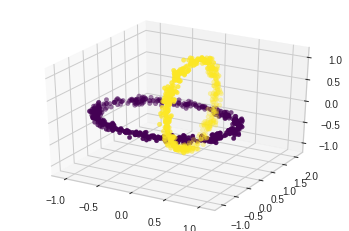

In [ ]:
#Hierarchical Clustering - Agglomerative Clustering
hCluster = AgglomerativeClustering(n_clusters=2, linkage = 'single')
hCluster.fit_predict(df4.iloc[:,1:4])
df4['hClusterClass'] = hCluster.labels_

# Plotting the 3 dimensional data
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df4['X1'], df4['X2'], df4['X3'], cmap = 'viridis', c=df4['hClusterClass']);
plt.show()

In [ ]:
Kmeans_Score_Internal = fowlkes_mallows_score(df4['Class'], df4['KMeansClassInternal'])
Kmeans_Score_External = fowlkes_mallows_score(df4['Class'], df4['KMeansClassExternal'])
HCluster_Score = fowlkes_mallows_score(df4['Class'], df4['hClusterClass'])
print('Kmeans Score (Internal):', Kmeans_Score_Internal)
print('KMeans Score (External):', Kmeans_Score_External)
print('HCluster Score:', HCluster_Score)

Kmeans Score (Internal): 0.5055294403325195
KMeans Score (External): 0.5459107296389125
HCluster Score: 1.0


So for Dataset 4 Hcluster method is giving a perfect score of 1 which means that it has classfied each data point correctly. Both KMeans with k=3 and 2 are not performing as good as HCluster method, while k = 2 is performing slighlty better than k = 3

###Dataset 5

In [ ]:
df5 = pd.read_csv('Data5.csv')
df5.head(5)

Unnamed: 0         X1         X2         X3  Class
0           1  -4.822490 -50.402170   4.020861      1
1           2 -44.460120  20.964670 -11.492060      1
2           3  50.001020   0.780748   9.134460      1
3           4 -41.699080 -22.310060  16.314120      1
4           5   4.425242  -4.666664  50.223740      1

In [ ]:
df5.describe()

Unnamed: 0          X1          X2          X3       Class
count    800.0000  800.000000  800.000000  800.000000  800.000000
mean     400.5000   -0.611640   -0.921962    0.824385    1.500000
std      231.0844   18.771445   18.472153   23.941496    0.500313
min        1.0000  -49.464740  -50.461010  -50.592120    1.000000
25%      200.7500   -4.443038   -4.950855   -4.424578    1.000000
50%      400.5000    0.109752   -0.407613    0.537025    1.500000
75%      600.2500    4.713370    3.885574    6.120185    2.000000
max      800.0000   50.001020   50.598880   50.585700    2.000000

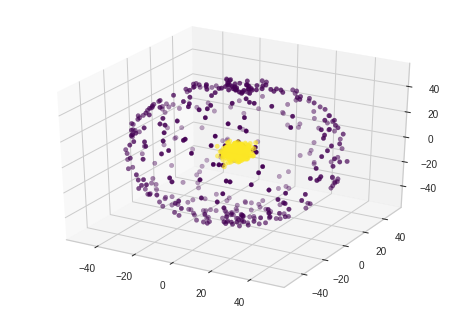

In [ ]:
# Plotting the 3 dimensional data

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df5['X1'], df5['X2'], df5['X3'], cmap='viridis', c=df5['Class']);

####KMeans Clustering

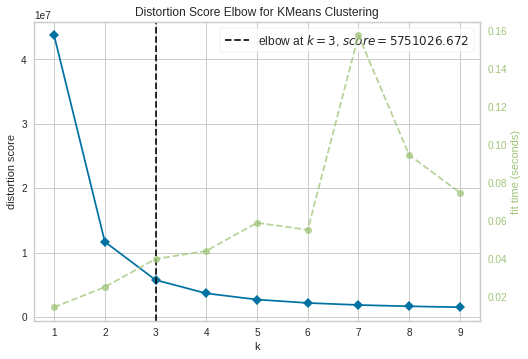

In [ ]:
# Plotting Elbow curve to determine the number of clusters

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings= True, locate_elbow=True)
visualizer.fit(df5)
visualizer.show() 

We can see that the Elbow is forming at k = 3, which is not equal to the original classes present in the data (that is 2)

So we will evaluate KMeans for both, k = 3 (internal validation) and 2 (external validation)

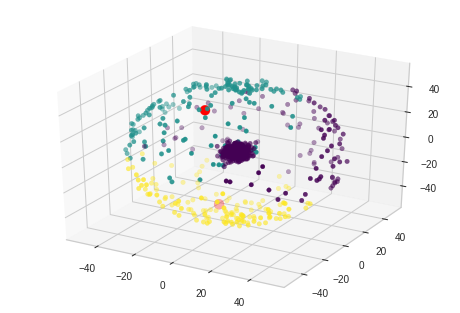

In [ ]:
#KMeans Clustering as k = 3
mdl = KMeans(n_clusters=3)
mdl.fit(df5.iloc[:,1:4])
df5['KMeansClassInternal'] = mdl.labels_


fig = plt.figure()
ax = plt.axes(projection='3d')
# Data for three-dimensional scattered points
ax.scatter3D(df5['X1'], df5['X2'], df5['X3'], cmap = 'viridis', c=df5['KMeansClassInternal']);
ax.scatter3D(mdl.cluster_centers_[:, 0], mdl.cluster_centers_[:, 1], mdl.cluster_centers_[:, 2], s = 100, c = 'red', label = 'Centroids')
plt.show()

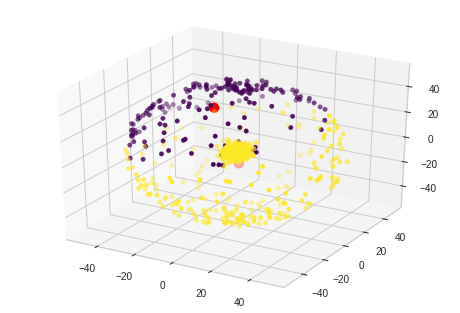

In [ ]:
#KMeans Clustering as k = 2
mdl = KMeans(n_clusters=2)
mdl.fit(df5.iloc[:,1:4])
df5['KMeansClassExternal'] = mdl.labels_


fig = plt.figure()
ax = plt.axes(projection='3d')
# Data for three-dimensional scattered points
ax.scatter3D(df5['X1'], df5['X2'], df5['X3'], cmap = 'viridis', c=df5['KMeansClassExternal']);
ax.scatter3D(mdl.cluster_centers_[:, 0], mdl.cluster_centers_[:, 1], mdl.cluster_centers_[:, 2], s = 100, c = 'red', label = 'Centroids')
plt.show()

####Hierarchical Clustering

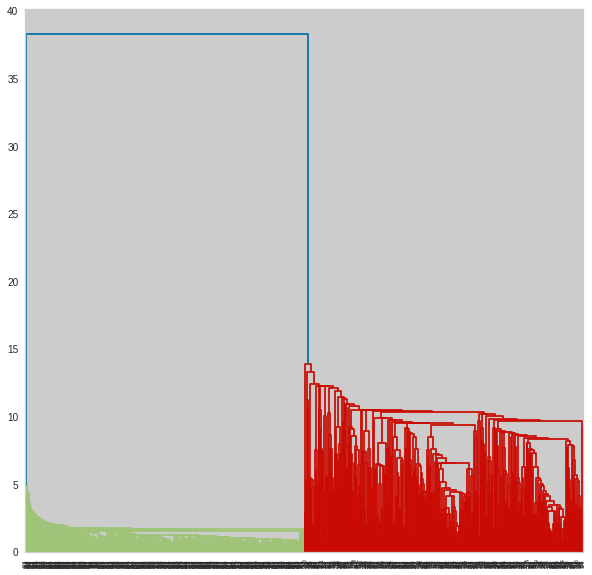

In [ ]:
# Plotting Dendrogram to determine the number of clusters for Hierarchical Clustering

plt.figure(figsize = (10, 10))
z = linkage(df5.iloc[:, 1:4], method = 'single')
dendo = dendrogram(z)

By looking at this dendrogram we can see that the value of k = 2, so we can take ncluster value as 2 which is similar to the number of classes in the original dataset5

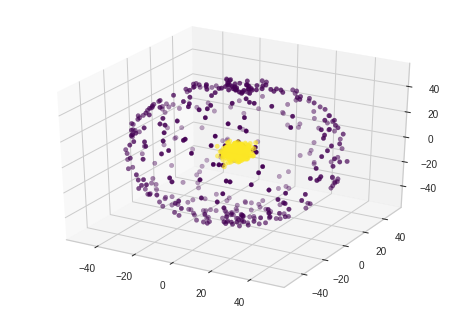

In [ ]:
# Hierarchical Clustering - Agglomerative Clustering
hCluster = AgglomerativeClustering(n_clusters=2, linkage = 'single')
hCluster.fit_predict(df5.iloc[:,1:4])
df5['hClusterClass'] = hCluster.labels_

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df5['X1'], df5['X2'], df5['X3'], cmap = 'viridis', c=df5['hClusterClass']);
plt.show()

####Evaluation

In [ ]:
Kmeans_Score_Internal = fowlkes_mallows_score(df5['Class'], df5['KMeansClassInternal'])
Kmeans_Score_External = fowlkes_mallows_score(df5['Class'], df5['KMeansClassExternal'])
HCluster_Score = fowlkes_mallows_score(df5['Class'], df5['hClusterClass'])
print('Kmeans Score (Internal, k=3):', Kmeans_Score_Internal)
print('KMeans Score (External, k=2):', Kmeans_Score_External)
print('HCluster Score:', HCluster_Score)

Kmeans Score (Internal, k=3): 0.6949341163470986
KMeans Score (External, k=2): 0.654708512069173
HCluster Score: 1.0


So for Dataset 5 Hcluster method is giving a perfect score of 1 which means that it has classfied each data point correctly. Both KMeans with k=3 and 2 are not performing as good as HCluster method, while KMeans with k = 3 is performing slighlty better than KMeans with k = 2

###Dataset 6

In [ ]:
df6 = pd.read_csv('Data6.csv')
df6.head(5)

Unnamed: 0        X1        X2  Class
0           1  1.388261  2.076096      1
1           2  2.177247  3.102304      1
2           3  0.378645  5.307610      1
3           4  3.681732  1.622681      1
4           5  2.462861  2.777897      1

In [ ]:
df6.describe()

Unnamed: 0           X1           X2        Class
count  4096.00000  4096.000000  4096.000000  4096.000000
mean   2048.50000     1.279324     1.714045     1.500000
std    1182.55768     1.454175     1.732789     0.500061
min       1.00000    -3.075178    -3.298857     1.000000
25%    1024.75000     0.276844     0.371124     1.000000
50%    2048.50000     1.156726     1.494928     1.500000
75%    3072.25000     2.190571     2.983782     2.000000
max    4096.00000     6.728720     7.793648     2.000000

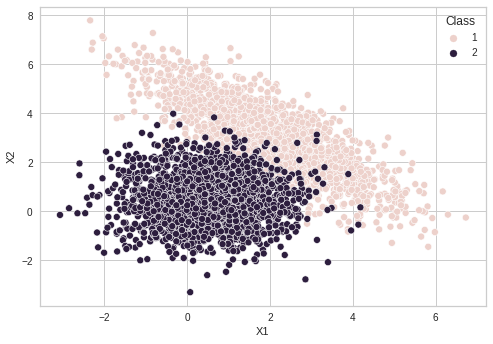

In [ ]:
#Plotting the original dataset

sns.scatterplot(x='X1', y='X2', data=df6, hue='Class')

####KMeans Clustering

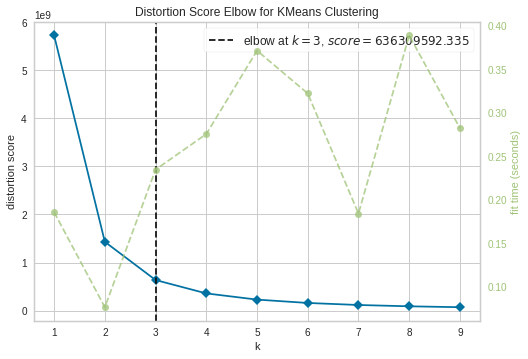

In [ ]:
# Plotting Elbow curve to determine the number of clusters

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings= True, locate_elbow=True)
visualizer.fit(df6)
visualizer.show() 

We can see that the Elbow is forming at k = 3, which is not equal to the original classes present in the data (that is 2)

So we will evaluate KMeans for both, k = 3 (internal validation) and 2 (external validation)

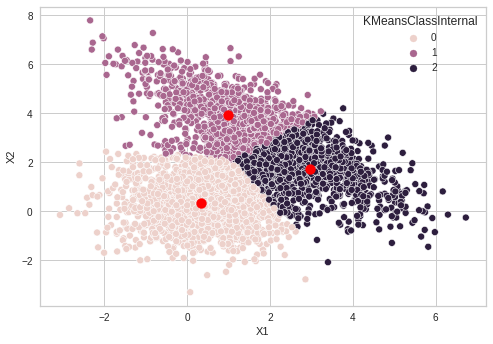

In [ ]:
#Kmeans Clustering with k = 3
mdl = KMeans(n_clusters=3)
mdl.fit(df6.iloc[:,1:3])
df6['KMeansClassInternal'] = mdl.labels_
sns.scatterplot(x = 'X1', y = 'X2', hue = 'KMeansClassInternal', data = df6)
plt.scatter(mdl.cluster_centers_[:, 0], mdl.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')
plt.show()

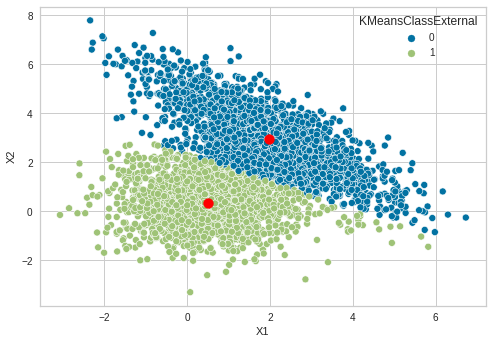

In [ ]:
#Kmeans Clustering with k = 2
mdl = KMeans(n_clusters=2)
mdl.fit(df6.iloc[:,1:3])
df6['KMeansClassExternal'] = mdl.labels_
sns.scatterplot(x = 'X1', y = 'X2', hue = 'KMeansClassExternal', data = df6)
plt.scatter(mdl.cluster_centers_[:, 0], mdl.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')
plt.show()

####Hierarchical Clustering

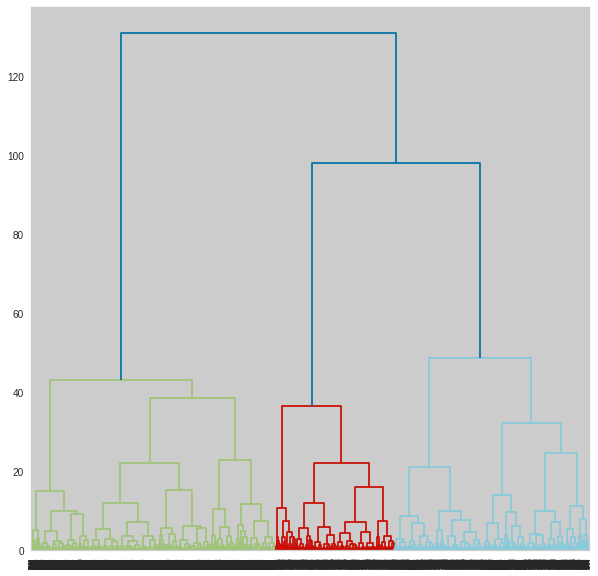

In [ ]:
# Plotting Dendrogram to determine the number of clusters for Hierarchical Clustering

plt.figure(figsize = (10, 10))
z = linkage(df6.iloc[:, 1:3], method = 'ward')
dendo = dendrogram(z)

By looking at this dendrogram we can see that the value of k = 3, which is not equal to the original classes present in the data (that is 2)

So we will evaluate Agglomerative Clustering for both, k = 3 (internal validation) and 2 (external validation)

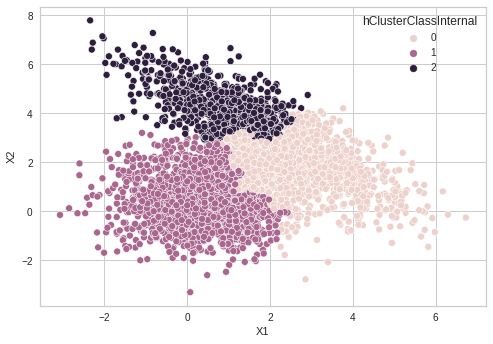

In [ ]:
# Hierarchical Clustering - Agglomerative Clustering
#k = 3
hCluster = AgglomerativeClustering(n_clusters=3, linkage = 'ward')
hCluster.fit_predict(df6.iloc[:,1:3])
df6['hClusterClassInternal'] = hCluster.labels_

sns.scatterplot(x = 'X1', y = 'X2', hue = 'hClusterClassInternal', data = df6)
plt.show()

In [ ]:
# Hierarchical Clustering - Agglomerative Clustering
#k = 2
hCluster = AgglomerativeClustering(n_clusters=2, linkage = 'ward')
hCluster.fit_predict(df6.iloc[:,1:3])
df6['hClusterClassExternal'] = hCluster.labels_

sns.scatterplot(x = 'X1', y = 'X2', hue = 'hClusterClassExternal', data = df6)
plt.show()

####Evaluation

In [ ]:
Kmeans_Score_Internal = fowlkes_mallows_score(df6['Class'], df6['KMeansClassInternal'])
HCluster_Score_Internal = fowlkes_mallows_score(df6['Class'], df6['hClusterClassInternal'])
Kmeans_Score_External = fowlkes_mallows_score(df6['Class'], df6['KMeansClassExternal'])
HCluster_Score_External = fowlkes_mallows_score(df6['Class'], df6['hClusterClassExternal'])
print('KMeans Score Internal (k=3):', Kmeans_Score_Internal)
print('HCluster Score Internal (k=3):', HCluster_Score_Internal)
print('KMeans Score External (k=2):', Kmeans_Score_External)
print('HCluster Score External (k=2):', HCluster_Score_External)

KMeans Score Internal (k=3): 0.755375989295788
HCluster Score Internal (k=3): 0.7416579880776025
KMeans Score External (k=2): 0.9076346454086384
HCluster Score External (k=2): 0.8602399807978651


So for Dataset 6 KMeans External (k=2) has the best score and is giving best performance among these 4


###Dataset 7

In [ ]:
df7 = pd.read_csv('Data7.csv')
df7.head(5)

Unnamed: 0        X1        X2  Class
0           1 -3.000000 -3.000000      5
1           2 -3.000000  3.000000      4
2           3  3.000000 -3.000000      6
3           4  3.000000  3.000000      3
4           5 -0.417091  0.114782      1

In [ ]:
df7.describe()

Unnamed: 0          X1          X2       Class
count  770.000000  770.000000  770.000000  770.000000
mean   385.500000    0.015556    0.006572    1.525974
std    222.424144    0.961348    0.950428    0.636943
min      1.000000   -3.050000   -3.050000    1.000000
25%    193.250000   -0.394639   -0.368391    1.000000
50%    385.500000    0.000048   -0.021113    1.000000
75%    577.750000    0.395799    0.369805    2.000000
max    770.000000    3.050000    3.050000    6.000000

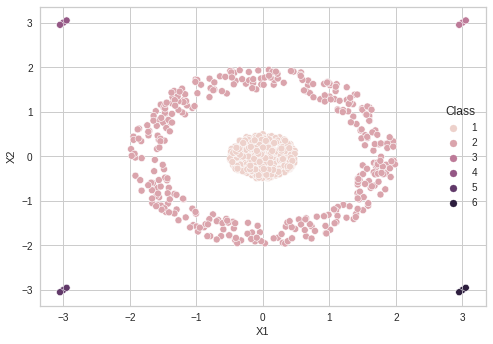

In [ ]:
#Plotting the original dataset
sns.scatterplot(x='X1', y='X2', data=df7, hue='Class')

####KMeans Clustering

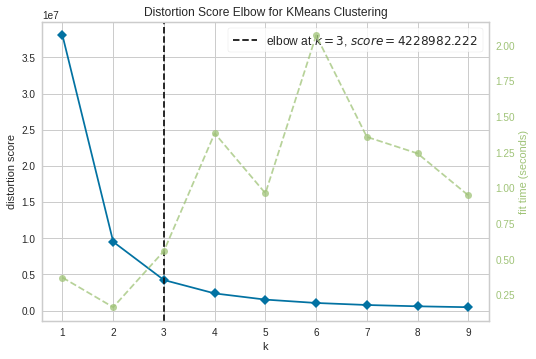

In [ ]:
# Plotting Elbow curve to determine the number of clusters

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings= True, locate_elbow=True)
visualizer.fit(df7)
visualizer.show() 

We can see that the Elbow is forming at k = 3, which is not equal to the original classes present in the data (that is 6)

So we will evaluate KMeans for both, k = 3 (internal validation) and 6 (external validation)

In [ ]:
#Kmeans Clustering with k = 3 

mdl = KMeans(n_clusters=3)
mdl.fit(df7.iloc[:,1:3])
df7['KMeansClassInternal'] = mdl.labels_
sns.scatterplot(x = 'X1', y = 'X2', hue = 'KMeansClassInternal', data = df7)
plt.scatter(mdl.cluster_centers_[:, 0], mdl.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')
plt.show()

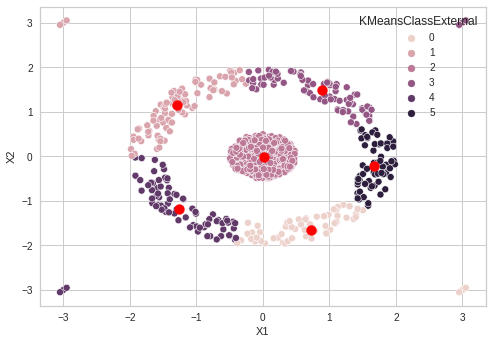

In [ ]:
#Kmeans Clustering with k = 6 

mdl = KMeans(n_clusters=6)
mdl.fit(df7.iloc[:,1:3])
df7['KMeansClassExternal'] = mdl.labels_
sns.scatterplot(x = 'X1', y = 'X2', hue = 'KMeansClassExternal', data = df7)
plt.scatter(mdl.cluster_centers_[:, 0], mdl.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')
plt.show()

####Hierarchical Clustering

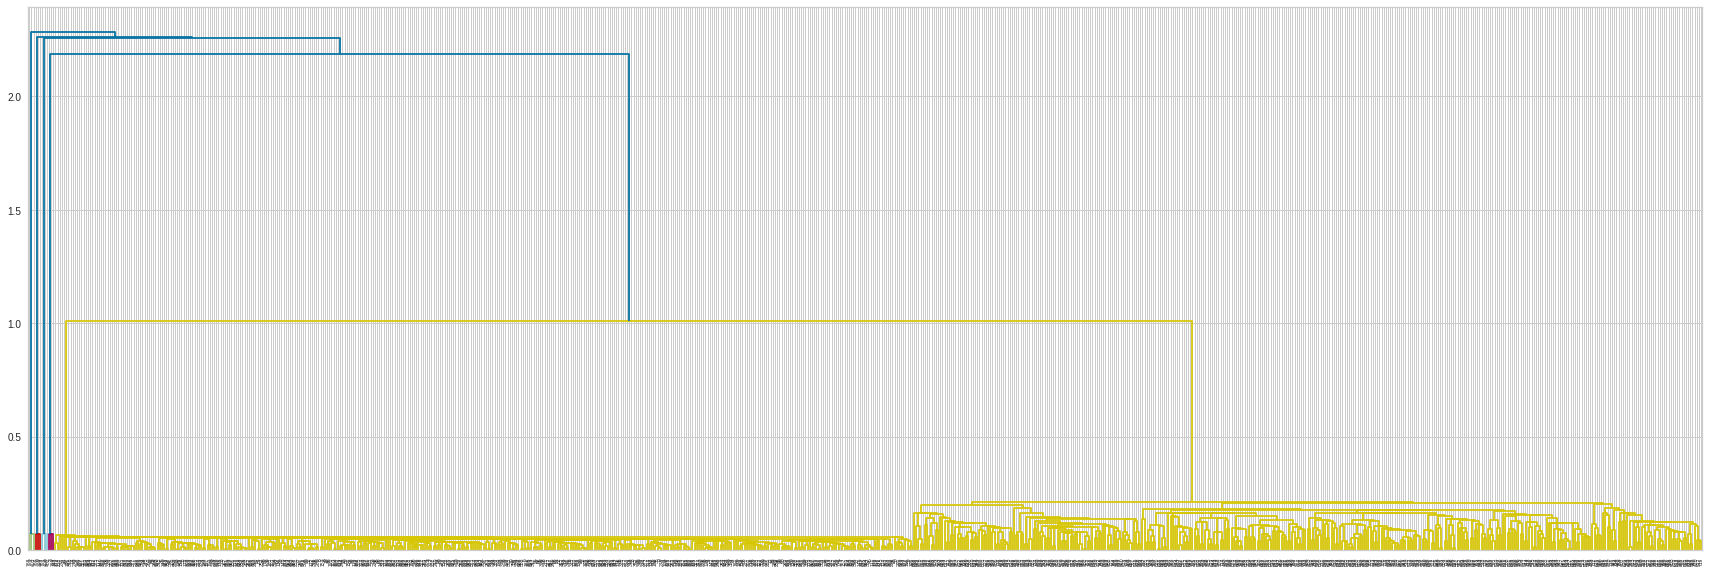

In [ ]:
# Plotting Dendrogram to determine the number of clusters for Hierarchical Clustering

plt.figure(figsize = (30, 10))
z = linkage(df7.iloc[:, 1:3], method = 'single')
dendo = dendrogram(z)

By looking at this dendrogram we can see that the value of k = 5, which is not equal to the original classes present in the data (that is 6)

So we will evaluate Agglomerative Clustering for both, k = 5 (internal validation) and 6 (external validation)

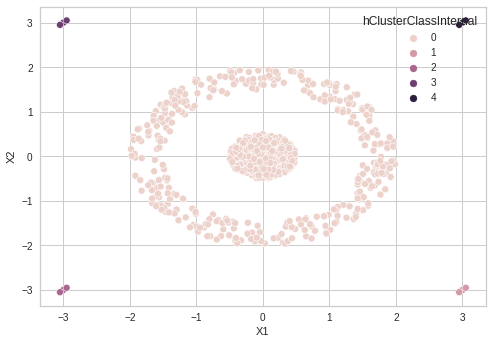

In [ ]:
# Hierarchical Clustering - Agglomerative Clustering
#k=5
hCluster = AgglomerativeClustering(n_clusters=5, linkage = 'single')
hCluster.fit_predict(df7.iloc[:,1:3])
df7['hClusterClassInternal'] = hCluster.labels_

sns.scatterplot(x = 'X1', y = 'X2', hue = 'hClusterClassInternal', data = df7)
plt.show()

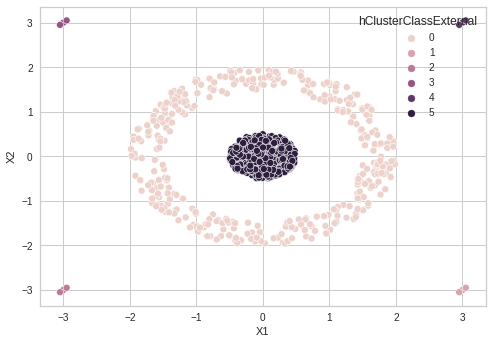

In [ ]:
# Hierarchical Clustering - Agglomerative Clustering
#k=6
hCluster = AgglomerativeClustering(n_clusters=6, linkage = 'single')
hCluster.fit_predict(df7.iloc[:,1:3])
df7['hClusterClassExternal'] = hCluster.labels_

sns.scatterplot(x = 'X1', y = 'X2', hue = 'hClusterClassExternal', data = df7)
plt.show()

####Evaluation

In [ ]:
Kmeans_Score_Internal = fowlkes_mallows_score(df7['Class'], df7['KMeansClassInternal'])
HCluster_Score_Internal = fowlkes_mallows_score(df7['Class'], df7['hClusterClassInternal'])
Kmeans_Score_External = fowlkes_mallows_score(df7['Class'], df7['KMeansClassExternal'])
HCluster_Score_External = fowlkes_mallows_score(df7['Class'], df7['hClusterClassExternal'])
print('KMeans Score Internal (k=3):', Kmeans_Score_Internal)
print('HCluster Score Internal (k=5):', HCluster_Score_Internal)
print('KMeans Score External (k=7):', Kmeans_Score_External)
print('HCluster Score External (k=7):', HCluster_Score_External)

KMeans Score Internal (k=3): 0.678785646743581
HCluster Score Internal (k=5): 0.7072854360711457
KMeans Score External (k=7): 0.7927883157828786
HCluster Score External (k=7): 1.0


So for Dataset 7 HCluster Method (External) with k = 7 has the best/perfect score and is giving the best performance among these 4

###Dataset 8

In [ ]:
df8 = pd.read_csv('Data8.csv')
df8.head(5)

Unnamed: 0        X1        X2       X3  Class
0           1  0.000000  0.000000  1.00000      1
1           2  0.000000  0.052336  0.99863      1
2           3  0.049774  0.016173  0.99863      1
3           4  0.030762 -0.042341  0.99863      1
4           5 -0.030762 -0.042341  0.99863      1

In [ ]:
df8.describe()

Unnamed: 0            X1            X2            X3   Class
count  4002.000000  4.002000e+03  4.002000e+03  4.002000e+03  4002.0
mean   2001.500000 -7.221513e-19 -3.722590e-18 -7.573485e-18     1.0
std    1155.422217  5.792099e-01  5.792099e-01  5.738309e-01     0.0
min       1.000000 -1.000000e+00 -1.000000e+00 -1.000000e+00     1.0
25%    1001.250000 -5.069495e-01 -5.039030e-01 -5.000000e-01     1.0
50%    2001.500000  0.000000e+00  0.000000e+00  0.000000e+00     1.0
75%    3001.750000  5.069495e-01  5.039030e-01  5.000000e-01     1.0
max    4002.000000  1.000000e+00  1.000000e+00  1.000000e+00     1.0

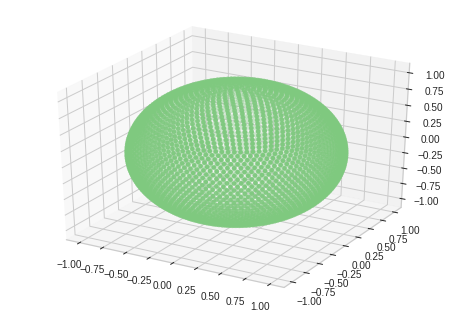

In [ ]:
# Plotting the 3 dimensional data

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df8['X1'], df8['X2'], df8['X3'], cmap='Accent', c=df8['Class']);

####KMeans Clustering

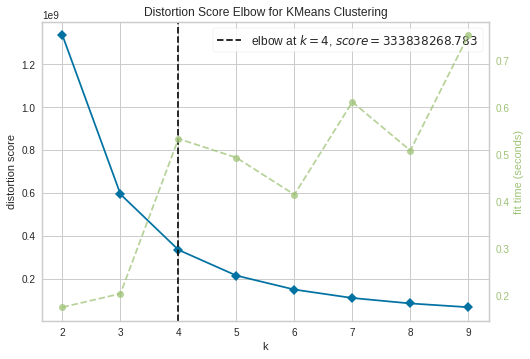

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), timings= True, locate_elbow=True)
visualizer.fit(df8)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

We can see that the Elbow is forming at k = 4, which is not equal to the original classes present in the data (that is 1)

So we will evaluate KMeans for both, k = 4 (internal validation) and 1 (external validation)

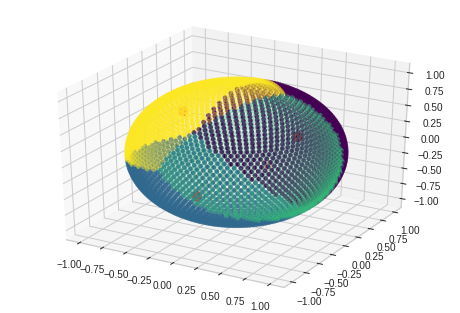

In [ ]:
#Kmeans Clustering with k = 4

mdl = KMeans(n_clusters=4)
mdl.fit(df8.iloc[:,1:4])
df8['KMeansClassInternal'] = mdl.labels_

# Plotting the 3 dimensional data
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df8['X1'], df8['X2'], df8['X3'], cmap = 'viridis', c=df8['KMeansClassInternal']);
ax.scatter3D(mdl.cluster_centers_[:, 0], mdl.cluster_centers_[:, 1], mdl.cluster_centers_[:, 2], s = 100, c = 'red', label = 'Centroids')
plt.show()

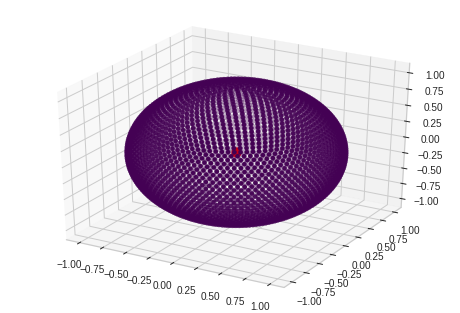

In [ ]:
#Kmeans Clustering with k = 1

mdl = KMeans(n_clusters=1)
mdl.fit(df8.iloc[:,1:4])
df8['KMeansClassExternal'] = mdl.labels_

# Plotting the 3 dimensional data
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df8['X1'], df8['X2'], df8['X3'], cmap = 'viridis', c=df8['KMeansClassExternal']);
ax.scatter3D(mdl.cluster_centers_[:, 0], mdl.cluster_centers_[:, 1], mdl.cluster_centers_[:, 2], s = 100, c = 'red', label = 'Centroids')
plt.show()

####Hierarchical Clustering

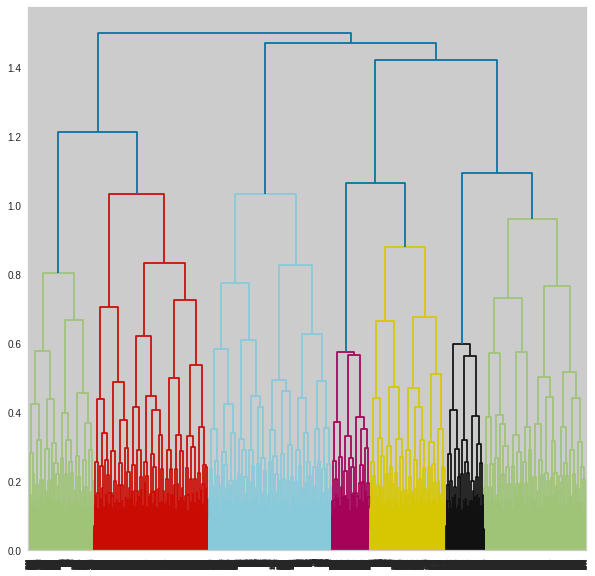

In [ ]:
# Plotting Dendrogram to determine the number of clusters for Hierarchical Clustering

plt.figure(figsize = (10, 10))
z = linkage(df8.iloc[:, 1:4], method = 'average')
dendo = dendrogram(z)

By looking at this dendrogram we can see that the value of k = 4, which is not equal to the original classes present in the data (that is 1)

So we will evaluate Agglomerative Clustering for both, k = 4 (internal validation) and 1 (external validation)

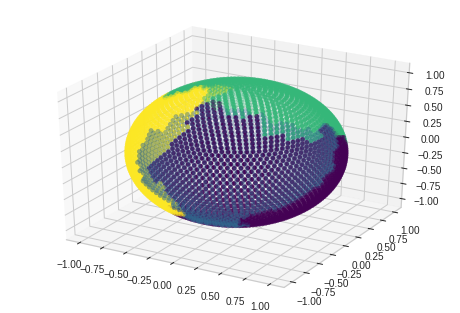

In [ ]:
# Hierarchical Clustering - Agglomerative Clustering
#k=4
hCluster = AgglomerativeClustering(n_clusters=4, linkage = 'average')
hCluster.fit_predict(df8.iloc[:,1:4])
df8['hClusterClassInternal'] = hCluster.labels_

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df8['X1'], df8['X2'], df8['X3'], cmap = 'viridis', c=df8['hClusterClassInternal']);
plt.show()

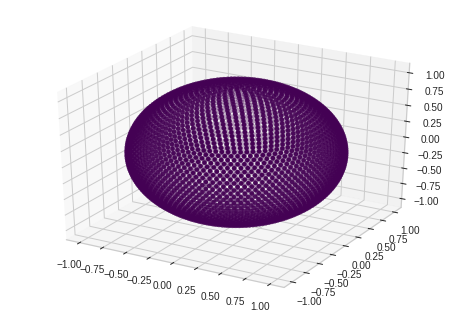

In [ ]:
# Hierarchical Clustering - Agglomerative Clustering
#k=1
hCluster = AgglomerativeClustering(n_clusters=1, linkage = 'average')
hCluster.fit_predict(df8.iloc[:,1:4])
df8['hClusterClassExternal'] = hCluster.labels_

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df8['X1'], df8['X2'], df8['X3'], cmap = 'viridis', c=df8['hClusterClassExternal']);
plt.show()

####Evaluation

In [ ]:
Kmeans_Score_Internal = fowlkes_mallows_score(df8['Class'], df8['KMeansClassInternal'])
HCluster_Score_Internal = fowlkes_mallows_score(df8['Class'], df8['hClusterClassInternal'])
Kmeans_Score_External = fowlkes_mallows_score(df8['Class'], df8['KMeansClassExternal'])
HCluster_Score_External = fowlkes_mallows_score(df8['Class'], df8['hClusterClassExternal'])
print('KMeans Score Internal (k=4):', Kmeans_Score_Internal)
print('HCluster Score Internal (k=4):', HCluster_Score_Internal)
print('KMeans Score External (k=1):', Kmeans_Score_External)
print('HCluster Score External (k=1):', HCluster_Score_External)

KMeans Score Internal (k=4): 0.49982257033952476
HCluster Score Internal (k=4): 0.5079308244819766
KMeans Score External (k=1): 1.0
HCluster Score External (k=1): 1.0


As Expected, KMeans and HClustering both are giving perfect score with k = 1, while both were giving almost same performance with k = 4 that is ~50%

##Task 2

In [4]:
# Uploading the dataset for Task 2
world_data = pd.read_csv('World Indicators.csv')

In [5]:
world_data.shape

(208, 20)

In [6]:
world_data.head(10)

Birth Rate Business Tax Rate  Days to Start Business  Energy Usage  \
0       0.025             72.0%                    25.0       41852.0   
1       0.046             52.1%                    66.0       13576.0   
2       0.037             65.9%                    29.0        3761.0   
3       0.024             19.5%                    60.0        2215.0   
4       0.042             43.5%                    13.0           NaN   
5       0.045             51.6%                    13.0           NaN   
6       0.038             48.8%                    15.0        6720.0   
7       0.035             54.6%                    22.0           NaN   
8       0.047             75.8%                    55.0           NaN   
9       0.036            217.9%                    22.0           NaN   

                GDP  Health Exp % GDP Health Exp/Capita  Hours to do Tax  \
0  $199,070,864,638             0.044              $233            451.0   
1  $104,115,863,405             0.034              $178            282.0   
2    $7,294,900,431             0.045               $34            270.0   
3   $15,292,424,757             0.052              $404            152.0   
4   $10,395,757,480             0.064               $39            270.0   
5    $2,355,652,064             0.090               $21            274.0   
6   $25,486,923,059             0.054               $64            654.0   
7    $2,195,599,491             0.039               $19            504.0   
8   $12,156,380,062             0.028               $25            732.0   
9      $610,372,697             0.036               $31            100.0   

   Infant Mortality Rate  Internet Usage  Lending Interest  \
0                  0.023             0.1             0.080   
1                  0.107             0.1             0.188   
2                  0.060             0.0               NaN   
3                  0.039             0.1             0.110   
4                  0.068             0.0               NaN   
5                  0.059             0.0             0.132   
6                  0.064             0.1               NaN   
7                  0.100             0.0               NaN   
8                  0.092             0.0               NaN   
9                  0.061             0.1             0.105   

   Life Expectancy Female  Life Expectancy Male  Mobile Phone Usage  \
0                    72.0                  69.0                 0.9   
1                    53.0                  50.0                 0.5   
2                    60.0                  58.0                 0.8   
3                    46.0                  47.0                 1.5   
4                    56.0                  55.0                 0.5   
5                    55.0                  51.0                 0.2   
6                    55.0                  53.0                 0.5   
7                    51.0                  47.0                 0.2   
8                    51.0                  49.0                 0.3   
9                    62.0                  59.0                 0.3   

   Population 0-14  Population 15-64  Population 65+  Population Urban  \
0            0.272             0.681           0.047             0.682   
1            0.477             0.499           0.024             0.409   
2            0.432             0.539           0.029             0.423   
3            0.340             0.625           0.035             0.565   
4            0.458             0.517           0.025             0.265   
5            0.440             0.535           0.025             0.109   
6            0.432             0.535           0.032             0.521   
7            0.404             0.558           0.039             0.390   
8            0.487             0.488           0.025             0.220   
9            0.422             0.549           0.029             0.280   

   Region                   Country  
0  Africa                   Algeria  
1  Afr

In [7]:
world_data.describe()

Birth Rate  Days to Start Business  Energy Usage  Health Exp % GDP  \
count  199.000000              181.000000  1.360000e+02        185.000000   
mean     0.021759               30.331492  9.223794e+04          0.067362   
std      0.010721               56.584357  3.125758e+05          0.028462   
min      0.008000                1.000000  7.650000e+02          0.017000   
25%      0.012000                9.000000  5.699000e+03          0.047000   
50%      0.019000               18.000000  1.808200e+04          0.065000   
75%      0.028000               35.000000  5.155725e+04          0.085000   
max      0.050000              694.000000  2.727728e+06          0.177000   

       Hours to do Tax  Infant Mortality Rate  Internet Usage  \
count       180.000000             188.000000      199.000000   
mean        279.283333               0.027340        0.376884   
std         247.783296               0.025358        0.284034   
min          12.000000               0.002000        0.000000   
25%         151.750000               0.007000        0.100000   
50%         224.000000               0.016000        0.400000   
75%         327.000000               0.042250        0.600000   
max        2600.000000               0.112000        0.900000   

       Lending Interest  Life Expectancy Female  Life Expectancy Male  \
count        131.000000              197.000000            197.000000   
mean           0.122588               72.746193             68.035533   
std            0.079495               10.091750              8.868297   
min            0.005000               45.000000             45.000000   
25%            0.074500               67.000000             62.000000   
50%            0.106000               76.000000             70.000000   
75%            0.150000               80.000000             75.000000   
max            0.525000               87.000000             81.000000   

       Mobile Phone Usage  Population 0-14  Population 15-64  Population 65+  \
count          196.000000       191.000000        191.000000      191.000000   
mean             0.958673         0.286963          0.635550        0.077424   
std              0.431784         0.107775          0.071489        0.052995   
min              0.000000         0.119000          0.475000        0.003000   
25%              0.700000         0.189000          0.581000        0.034000   
50%              1.000000         0.279000          0.654000        0.056000   
75%              1.200000         0.382500          0.684500        0.118000   
max              2.500000         0.499000          0.857000        0.237000   

       Population Urban  
count        206.000000  
mean           0.576728  
std            0.244372  
min            0.089000  
25%            0.377750  
50%            0.571500  
75%            0.772500  
max            1.000000

####Data Pre-processing

In [8]:
# Checking the number of nulls present in the data
world_data.isnull().sum()

Birth Rate                 9
Business Tax Rate         27
Days to Start Business    27
Energy Usage              72
GDP                       20
Health Exp % GDP          23
Health Exp/Capita         23
Hours to do Tax           28
Infant Mortality Rate     20
Internet Usage             9
Lending Interest          77
Life Expectancy Female    11
Life Expectancy Male      11
Mobile Phone Usage        12
Population 0-14           17
Population 15-64          17
Population 65+            17
Population Urban           2
Region                     0
Country                    0
dtype: int64

We can see that for columns 'Energy Usage' & 'Lending Interest' most of the values in the column are nulls. As we can not use nulls while doing clustering and most of the data present is null, it's better to remove these columns for our further investigation

In [9]:
# Removing null value columns
world_data.drop(['Energy Usage', 'Lending Interest'], axis = 1, inplace = True)

In [10]:
# Removing nulls from other columns as well
world_data.dropna(inplace = True)

In [11]:
# Again checking the number of nulls present in the dataset
world_data.isnull().sum()

Birth Rate                0
Business Tax Rate         0
Days to Start Business    0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Urban          0
Region                    0
Country                   0
dtype: int64

In [12]:
# Correcting the datatype for 3 of the below columns and converting them to numeric so as to use them as variables in clustering
world_data['Business Tax Rate'] = world_data['Business Tax Rate'].str.rstrip("%").astype(float)
world_data['GDP'] = world_data['GDP'].replace('[\$,]', '', regex=True).astype(float)
world_data['Health Exp/Capita'] = world_data['Health Exp/Capita'].replace('[\$,]', '', regex=True)

In [13]:
#Checking the data again
world_data.head(10)

Birth Rate  Business Tax Rate  Days to Start Business           GDP  \
0       0.025               72.0                    25.0  1.990709e+11   
1       0.046               52.1                    66.0  1.041159e+11   
2       0.037               65.9                    29.0  7.294900e+09   
3       0.024               19.5                    60.0  1.529242e+10   
4       0.042               43.5                    13.0  1.039576e+10   
5       0.045               51.6                    13.0  2.355652e+09   
6       0.038               48.8                    15.0  2.548692e+10   
7       0.035               54.6                    22.0  2.195599e+09   
8       0.047               75.8                    55.0  1.215638e+10   
9       0.036              217.9                    22.0  6.103727e+08   

   Health Exp % GDP Health Exp/Capita  Hours to do Tax  Infant Mortality Rate  \
0             0.044               233            451.0                  0.023   
1             0.034               178            282.0                  0.107   
2             0.045                34            270.0                  0.060   
3             0.052               404            152.0                  0.039   
4             0.064                39            270.0                  0.068   
5             0.090                21            274.0                  0.059   
6             0.054                64            654.0                  0.064   
7             0.039                19            504.0                  0.100   
8             0.028                25            732.0                  0.092   
9             0.036                31            100.0                  0.061   

   Internet Usage  Life Expectancy Female  Life Expectancy Male  \
0             0.1                    72.0                  69.0   
1             0.1                    53.0                  50.0   
2             0.0                    60.0                  58.0   
3             0.1                    46.0                  47.0   
4             0.0                    56.0                  55.0   
5             0.0                    55.0                  51.0   
6             0.1                    55.0                  53.0   
7             0.0                    51.0                  47.0   
8             0.0                    51.0                  49.0   
9             0.1                    62.0                  59.0   

   Mobile Phone Usage  Population 0-14  Population 15-64  Population 65+  \
0                 0.9            0.272             0.681           0.047   
1                 0.5            0.477             0.499           0.024   
2                 0.8            0.432             0.539           0.029   
3                 1.5            0.340             0.625           0.035   
4                 0.5            0.458             0.517           0.025   
5                 0.2            0.440             0.535           0.025   
6                 0.5            0.432             0.535           0.032   
7                 0.2            0.404             0.558           0.039   
8                 0.3            0.487             0.488           0.025   
9                 0.3            0.422             0.549           0.029   

   Population Urban  Region                   Country  
0             0.682  Africa                   Algeria  
1             0.409  Africa                    Angola  
2             0.423  Africa                     Benin  
3             0.565  Africa                  Botswana  
4             0.265  Africa              Burkina Faso  
5             0.109  Africa                   Burundi  
6             0.521  Africa                  Cameroon  
7             0.390  Africa  Central African Republic  
8             0.220  Africa                      Chad  
9             0.280  Africa                   Comoros

In [14]:
# Scaling the dataset using MinMax Scalar function

scaler = MinMaxScaler(feature_range=(0,1))
WorldScaled = scaler.fit_transform(world_data.iloc[:,0:16])
WorldScaled = pd.DataFrame(WorldScaled, columns=('Birth Rate', 'Business Tax Rate', 'Days to Start Business', 'GDP', 'Health Exp % GDP', 'Health Exp/Capita',
                                                 'Hours to do Tax', 'Infant Mortality Rate', 'Internet Usage', 'Life Expectancy Female', 'Life Expectancy Male',
                                                 'Mobile Phone Usage', 'Population 0-14', 'Population 15-64', 'Population 65+', 'Population Urban'))
WorldScaled

Birth Rate  Business Tax Rate  Days to Start Business       GDP  \
0      0.404762           0.192319                0.034632  0.012804   
1      0.904762           0.132144                0.093795  0.006692   
2      0.690476           0.173874                0.040404  0.000459   
3      0.380952           0.033565                0.085137  0.000973   
4      0.809524           0.106138                0.017316  0.000658   
..          ...                ...                     ...       ...   
166    0.238095           0.058966                1.000000  0.000270   
167    0.166667           0.062594                0.057720  0.001513   
168    0.119048           0.115210                0.005772  1.000000   
169    0.166667           0.101300                0.008658  0.003030   
170    0.285714           0.164500                0.202020  0.020363   

     Health Exp % GDP  Health Exp/Capita  Hours to do Tax  \
0            0.158228           0.022332         0.169629   
1            0.094937           0.016774         0.104328   
2            0.164557           0.002223         0.099691   
3            0.208861           0.039612         0.054096   
4            0.284810           0.002728         0.099691   
..                ...                ...              ...   
166          0.259494           0.048302         0.072257   
167          0.215190           0.093270         0.076507   
168          1.000000           0.854386         0.067620   
169          0.436709           0.121362         0.125193   
170          0.164557           0.047999         0.329212   

     Infant Mortality Rate  Internet Usage  Life Expectancy Female  \
0                 0.190909        0.111111                0.658537   
1                 0.954545        0.111111                0.195122   
2                 0.527273        0.000000                0.365854   
3                 0.336364        0.111111                0.024390   
4                 0.600000        0.000000                0.268293   
..                     ...             ...                     ...   
166               0.181818        0.333333                0.707317   
167               0.163636        0.666667                0.682927   
168               0.036364        0.777778                0.878049   
169               0.072727        0.555556                0.853659   
170               0.109091        0.444444                0.780488   

     Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                0.666667                0.45         0.381471   
1                0.138889                0.25         0.940054   
2                0.361111                0.40         0.817439   
3                0.055556                0.75         0.566757   
4                0.277778                0.25         0.888283   
..                    ...                 ...              ...   
166              0.611111                0.50         0.411444   
167              0.583333                0.70         0.204360   
168              0.861111                0.45         0.177112   
169              0.777778                0.70         0.247956   
170              0.722222                0.50         0.433243   

     Population 15-64  Population 65+  Population Urban  
0            0.539267        0.188034          0.650933  
1            0.062827        0.089744          0.351262  
2            0.167539        0.111111          0.366630  
3            0.392670        0.136752          0.522503  
4            0.109948        0.094017          0.193194  
..                ...             ...               ...  
166          0.463351        0.264957          0.630077  
167          0.609948        0.350427          0.000000  
168          0.507853        0.555556          0.790340  
169          0.426702        0.581197          0.940724  
170          0.460733        0.235043          0.877058  

[171 rows x 16 columns]

###KMeans Clustering

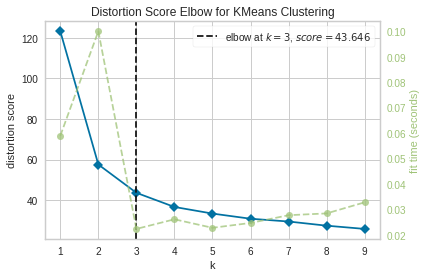

In [15]:
# Plotting Elbow curve to determine the number of clusters

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings= True, locate_elbow=True)
visualizer.fit(WorldScaled)
visualizer.show() 

In [16]:
#KMeans Clustering
mdl = KMeans(n_clusters=3)
mdl.fit(WorldScaled)
world_data['KMeansClass'] = mdl.labels_


###Hierarchical Clustering

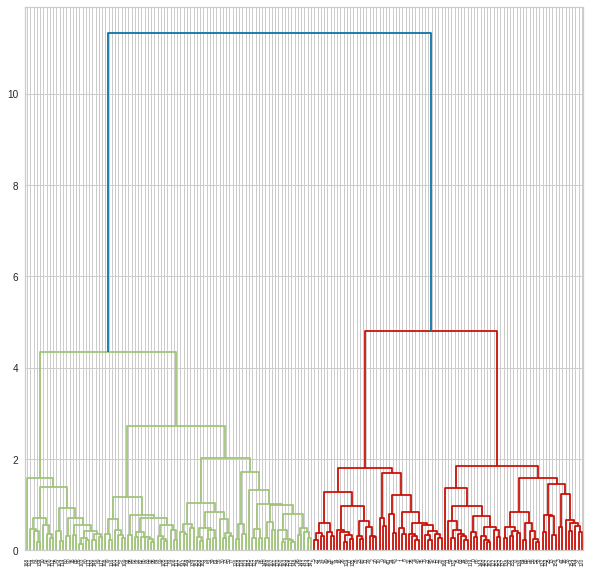

In [17]:
# Plotting Dendrogram to determine the number of clusters for Hierarchical Clustering

plt.figure(figsize = (10, 10))
z = linkage(WorldScaled, method = 'ward')
dendo = dendrogram(z)

In [18]:
#Hierarchical Clustering - Agglomerative Clustering

hCluster = AgglomerativeClustering(n_clusters=2, linkage = 'ward')
hCluster.fit_predict(WorldScaled)
world_data['hClusterClass'] = hCluster.labels_

###Evaluation

####Silhouette Method - to evaluate the clustering method

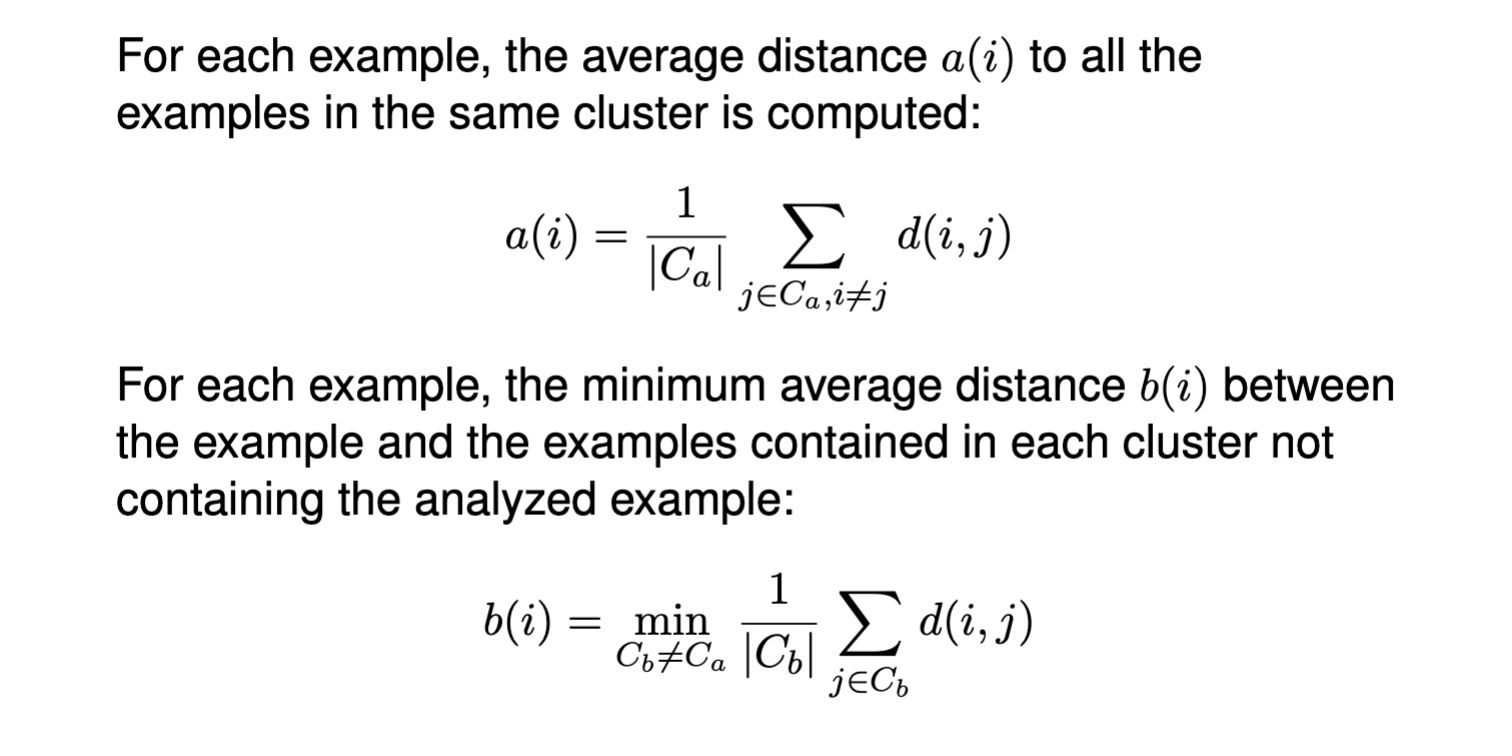

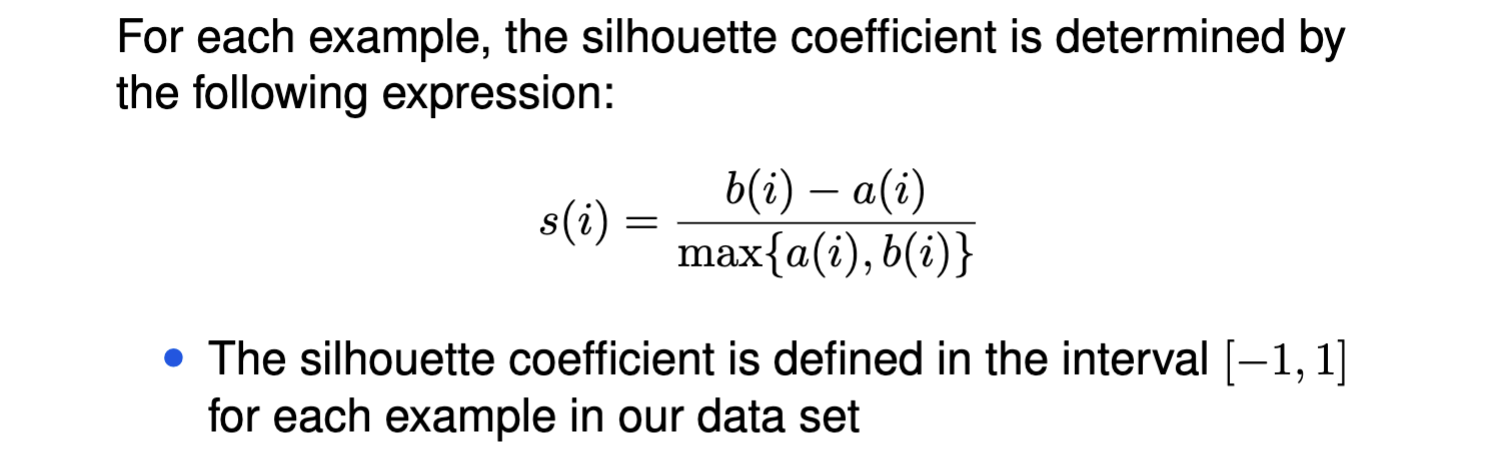

In [26]:
print('Silhouette Score KMeans:'+  str(metrics.silhouette_score(WorldScaled, world_data['KMeansClass'])))
print('Silhouette Score HCluster:'+  str(metrics.silhouette_score(WorldScaled, world_data['hClusterClass'])))

Silhouette Score KMeans:0.3175492476255927
Silhouette Score HCluster:0.4176400922367597


####Dunn Index to evaluate the clustering method

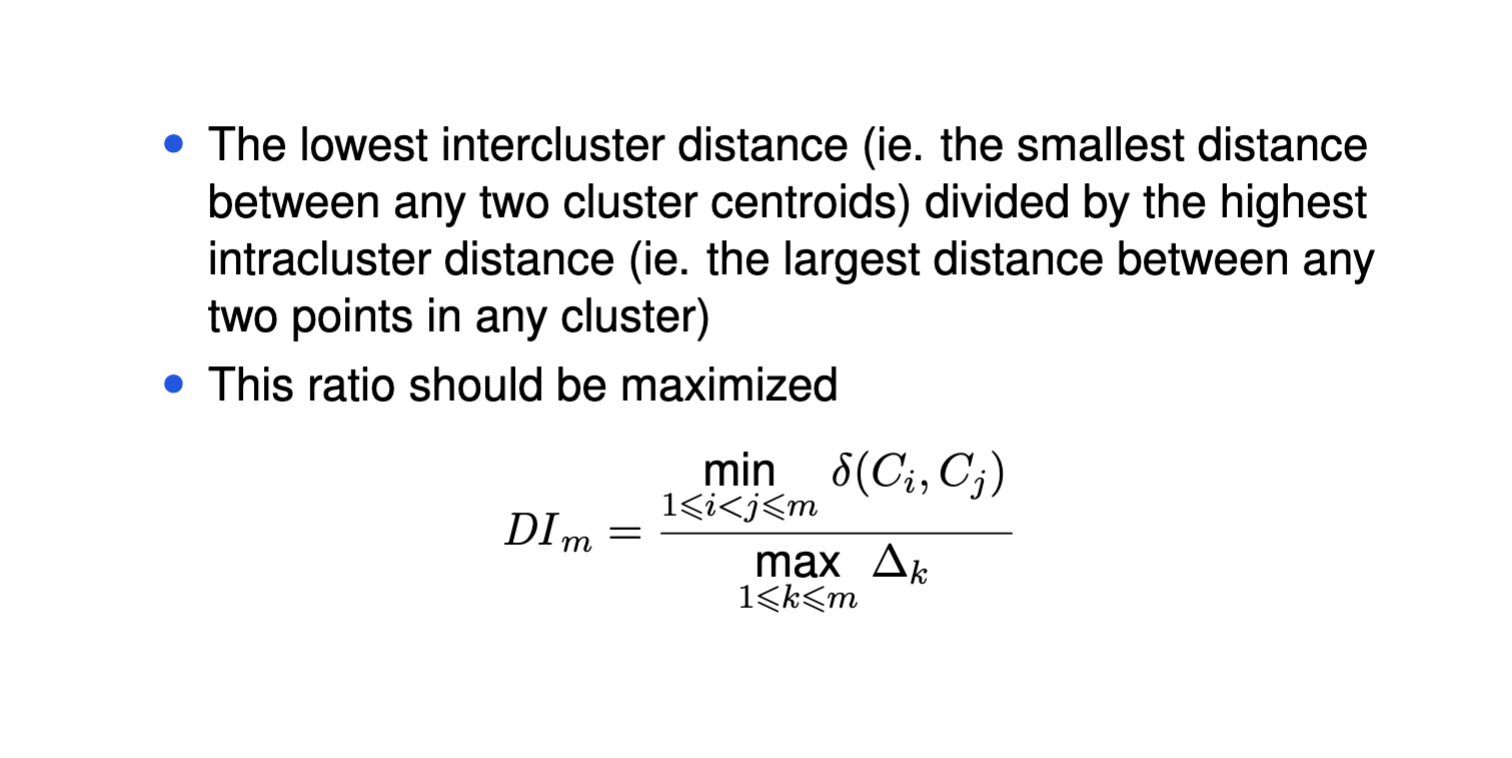

In [23]:
from validclust import dunn
from sklearn.metrics import pairwise_distances
dist_world = pairwise_distances(WorldScaled)
dunn_world_hc = dunn(dist_world,  world_data['hClusterClass'])
dunn_world_km = dunn(dist_world,  world_data['KMeansClass'])
print('DI World Data HCluster: '+ str(dunn_world_hc))
print('DI World Data KMeans: '+ str(dunn_world_km))

DI World Data HCluster: 0.14142629053178704
DI World Data KMeans: 0.150141439870042


#### We can't choose looking at the Dunn Index between KMeans and Hierarchical Clustering because the numbers are very similar and low.

#### However, when we compare the Silhouette Scores for both, we can see that Hierarchical Clustering outperforms KMeans Clustering, which is why we chose Hierarchical Clustering.

###Group Details

In [61]:
#Number of Countries in both classes
world_data.groupby('hClusterClass')['Country'].nunique()

#There are 83 countries in class 0 and 88 in class 1

hClusterClass
0    83
1    88
Name: Country, dtype: int64

In [67]:
world_data[['Country', 'hClusterClass']].sort_values(by=['hClusterClass'])

Country  hClusterClass
0          Algeria              0
77        Pakistan              0
76           Nepal              0
74        Mongolia              0
187          Haiti              0
..             ...            ...
103         Greece              1
102        Germany              1
101         France              1
115          Malta              1
206  Venezuela, RB              1

[171 rows x 2 columns]

In [53]:
#Avg GDP of both cluster groups
world_data.groupby('hClusterClass')['GDP'].mean()

#we can see that avg GDP of class 1 is greater than class 0 by around 10 times

hClusterClass
0    7.669852e+10
1    7.259095e+11
Name: GDP, dtype: float64

In [54]:
#Avg Life Expectancy Male of both cluster groups
world_data.groupby('hClusterClass')['Life Expectancy Male'].mean()

#we can see that avg Life Expectancy of male of class 1 is greater than class 0 by around 13 years

hClusterClass
0    60.722892
1    73.920455
Name: Life Expectancy Male, dtype: float64

In [55]:
#Avg Life Expectancy Female of both cluster groups
world_data.groupby('hClusterClass')['Life Expectancy Female'].mean()

#we can see that avg Life Expectancy of female of class 1 is greater than class 0 by around 15 years

hClusterClass
0    64.216867
1    79.704545
Name: Life Expectancy Female, dtype: float64

In [57]:
#Avg Infant Mortality Rate of both cluster groups
world_data.groupby('hClusterClass')['Infant Mortality Rate'].mean()

#we can see that avg Infant Mortality Rate of class 1 is lower than class 0

hClusterClass
0    0.046952
1    0.008955
Name: Infant Mortality Rate, dtype: float64

In [60]:
#Avg Life Expectancy Male of both cluster groups
world_data.groupby('hClusterClass')['Mobile Phone Usage'].mean()

#we can see that avg Mobile Usage goes up in Class 1

hClusterClass
0    0.677108
1    1.209091
Name: Mobile Phone Usage, dtype: float64

In [66]:
#Avg Internet Usage of both cluster groups
world_data.groupby('hClusterClass')['Internet Usage'].mean()

#we can see that avg Internet usage is way up in class 1 than in class 0

hClusterClass
0    0.118072
1    0.592045
Name: Internet Usage, dtype: float64

In [63]:
#Avg Urban Population of both cluster groups
world_data.groupby('hClusterClass')['Population Urban'].mean()

#we can see that avg Urban Population of class 1 is greater than class 0 where around 69.4% of total population of class 1 lives in Urban areas 
#whereas only 41% of total population of class 0 lives in Urban areas 

hClusterClass
0    0.409867
1    0.694795
Name: Population Urban, dtype: float64

###Scatter Plots

Text(0.5, 1.0, 'Infant Mortality Rate vs GDP')

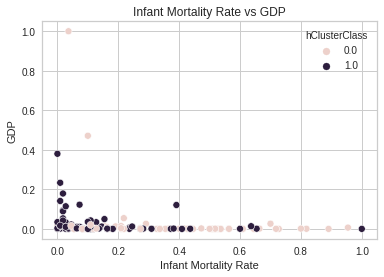

In [71]:
#Plot of Infant Mortality Rate vs GDP
sns.scatterplot(x= WorldScaled['Infant Mortality Rate'], y = WorldScaled['GDP'], hue=world_data['hClusterClass'])
plt.title('Infant Mortality Rate vs GDP')

Text(0.5, 1.0, 'Life Expectancy Male vs GDP')

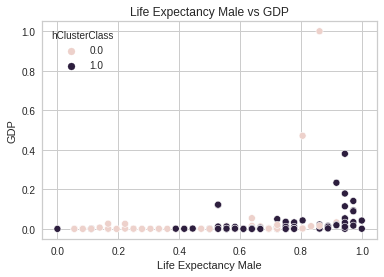

In [75]:
#Plot of Life Expectancy Male vs GDP
sns.scatterplot(x= WorldScaled['Life Expectancy Male'], y = WorldScaled['GDP'], hue=world_data['hClusterClass'])
plt.title('Life Expectancy Male vs GDP')

Text(0.5, 1.0, 'Life Expectancy Female vs GDP')

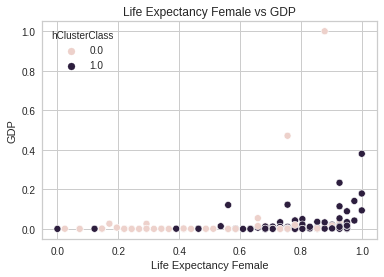

In [76]:
#Plot of Life Expectancy Female vs GDP
sns.scatterplot(x= WorldScaled['Life Expectancy Female'], y = WorldScaled['GDP'], hue=world_data['hClusterClass'])
plt.title('Life Expectancy Female vs GDP')

Text(0.5, 1.0, 'Urban Population vs Mobile Phone Usage')

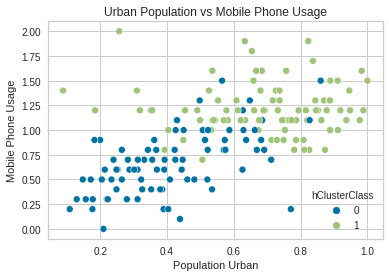

In [69]:
#Plot of mobile phone usage vs Urban Population
sns.scatterplot(x= world_data['Population Urban'], y = world_data['Mobile Phone Usage'], hue=world_data['hClusterClass'])
plt.title('Urban Population vs Mobile Phone Usage')

Text(0.5, 1.0, 'Mobile Phone Usage vs Population 15-64')

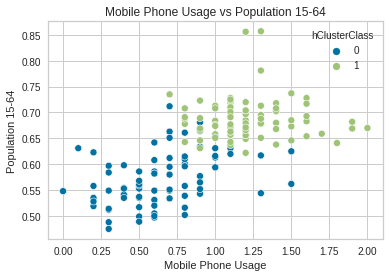

In [70]:
# Plot of % Population of age b/w 15-64 vs Mobile Phone Usage
sns.scatterplot(y= world_data['Population 15-64'], x = world_data['Mobile Phone Usage'], hue=world_data['hClusterClass'])
plt.title('Mobile Phone Usage vs Population 15-64')